In [75]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Analyze Validation Results

In [76]:
base_dir = "./outputs/2024-04-21/21-54-42/outputs/eval/"
eval_tokens = []
eval_rewards = []

f1s = []
ems = []
lengths = []
for i in range(500, 6500, 500):
    with open(f'{base_dir}outputs.step.{i}.json', 'r') as f:
        eval_result = json.load(f)
        eval_rewards.append(eval_result['scores'])
        eval_tokens.append(eval_result['output_tokens'])
        f1s.append(eval_result['score_log']['f1_scores'])
        ems.append(eval_result['score_log']['em_scores'])
        lengths.append(eval_result['score_log']['len_score'])


In [77]:
eval_rewards = np.asarray(eval_rewards)

In [125]:
# np.asarray(eval_result['score_log']['em_scores']).shape
eval_rewards.shape

(12, 2400)

In [79]:
mean_rewards = eval_rewards.mean(axis=1)

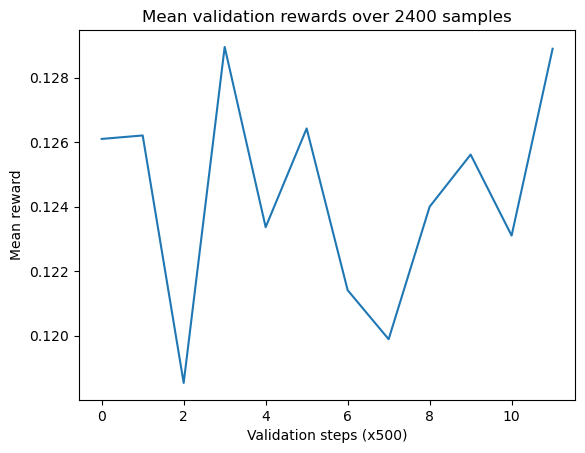

In [80]:
fig, ax = plt.subplots()
ax.set_title("Mean validation rewards over 2400 samples")
ax.set_xlabel("Validation steps (x500)")
ax.set_ylabel("Mean reward")
ax.plot(mean_rewards)
plt.show()

In [81]:
ems = np.asarray(ems)
f1s = np.asarray(f1s)
lens = np.asarray(lengths)

In [82]:
ems.shape

(12, 8, 48)

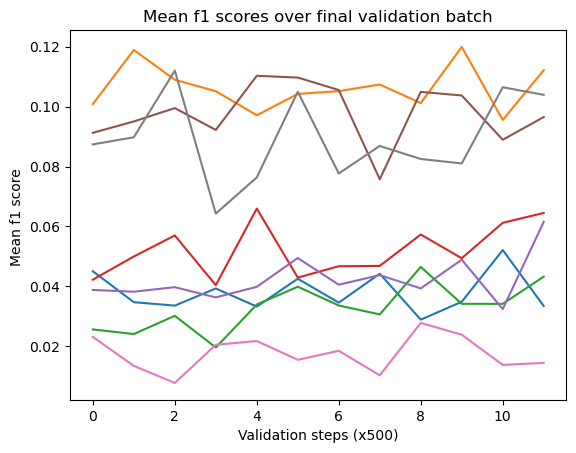

In [123]:
fig, ax = plt.subplots()
ax.set_title("Mean f1 scores over final validation batch")
ax.set_xlabel("Validation steps (x500)")
ax.set_ylabel("Mean f1 score ")
for i in range(8):
    ax.plot(f1s[:, i].mean(axis=1), label=f'sample {i}')

# plt.legend()
plt.show()


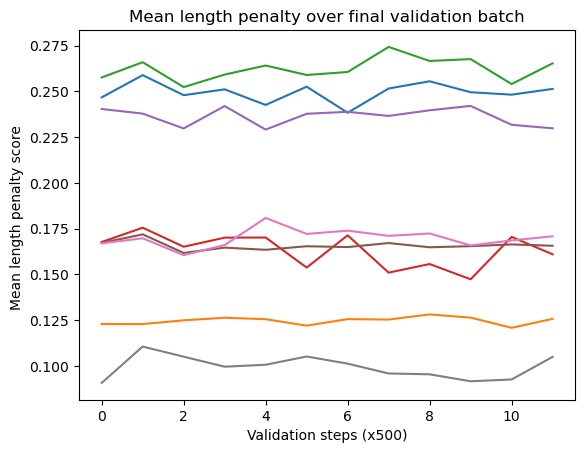

In [124]:
fig, ax = plt.subplots()
ax.set_title("Mean length penalty over final validation batch")
ax.set_xlabel("Validation steps (x500)")
ax.set_ylabel("Mean length penalty score ")
for i in range(8):
    ax.plot(lens[:, i].mean(axis=1), label=str(i))

In [85]:
train_log_output_file = "./outputs/2024-04-21/21-54-42/outputs/eval/training_log.epoch.1.json"

with open(train_log_output_file, 'r') as f:
    tr_data = json.load(f)
    

In [86]:
print(tr_data[0].keys())

dict_keys(['SQL_ON/rewards/em_scores', 'SQL_ON/rewards/f1_scores', 'SQL_ON/rewards/len_score', 'SQL_ON/loss', 'SQL_ON/sequence_length', 'SQL_ON/loss-normalized', 'SQL_ON/v2/0/Q/min', 'SQL_ON/v2/0/Q/max', 'SQL_ON/v2/0/Q/mean', 'SQL_ON/v2/0/V/min', 'SQL_ON/v2/0/V/max', 'SQL_ON/v2/0/V/mean', 'SQL_ON/v2/0/A/min', 'SQL_ON/v2/0/A/max', 'SQL_ON/v2/0/A/mean', 'SQL_ON/v2/0/Q_/min', 'SQL_ON/v2/0/Q_/max', 'SQL_ON/v2/0/Q_/mean', 'SQL_ON/v2/0/V_/min', 'SQL_ON/v2/0/V_/max', 'SQL_ON/v2/0/V_/mean', 'SQL_ON/v2/0/A_/min', 'SQL_ON/v2/0/A_/max', 'SQL_ON/v2/0/A_/mean', 'SQL_ON/v2/0/H/min', 'SQL_ON/v2/0/H/max', 'SQL_ON/v2/0/H/mean', 'SQL_ON/v2/0/H_/min', 'SQL_ON/v2/0/H_/max', 'SQL_ON/v2/0/H_/mean', 'SQL_ON/v3/0/Q/min', 'SQL_ON/v3/0/Q/max', 'SQL_ON/v3/0/Q/mean', 'SQL_ON/v3/0/V/min', 'SQL_ON/v3/0/V/max', 'SQL_ON/v3/0/V/mean', 'SQL_ON/v3/0/A/min', 'SQL_ON/v3/0/A/max', 'SQL_ON/v3/0/A/mean', 'SQL_ON/v3/0/V_/min', 'SQL_ON/v3/0/V_/max', 'SQL_ON/v3/0/V_/mean', 'SQL_ON/rewards/raw', 'SQL_ON/rewards/shaped'])


In [87]:
tr_ems = []
tr_f1s = []
tr_rewards = []
tr_rewards_shaped = []
tr_lens = []
tr_loss = []
for tr in tr_data:
    
    tr_ems.append(tr['SQL_ON/rewards/em_scores'])
    tr_f1s.append(tr['SQL_ON/rewards/f1_scores'])
    tr_rewards.append(tr['SQL_ON/rewards/raw'])
    tr_rewards_shaped.append(tr['SQL_ON/rewards/shaped'])
    tr_lens.append(tr['SQL_ON/rewards/len_score'])
    tr_loss.append(tr['SQL_ON/loss'])

In [118]:
tr_ems.shape

(6000, 3, 48)

In [136]:
tr_ems = np.asarray(tr_ems)
tr_f1s = np.asarray(tr_f1s)
tr_rewards = np.asarray(tr_rewards)
tr_rewards_shaped = np.asarray(tr_rewards_shaped)
tr_lens = np.asarray(tr_lens)
tr_loss = np.asarray(tr_loss)

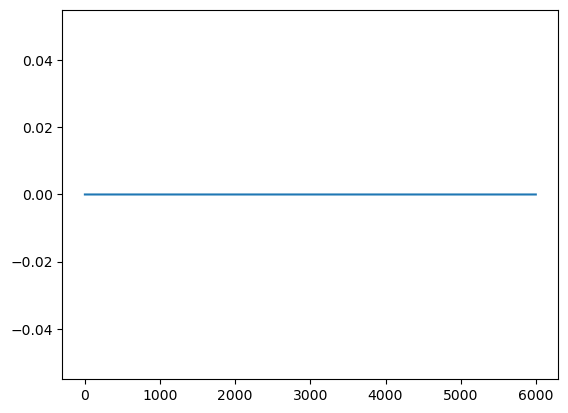

In [89]:
plt.plot(tr_ems.mean(axis=1).mean(axis=1))

In [126]:
tr_f1s.shape

(6000, 3, 48)

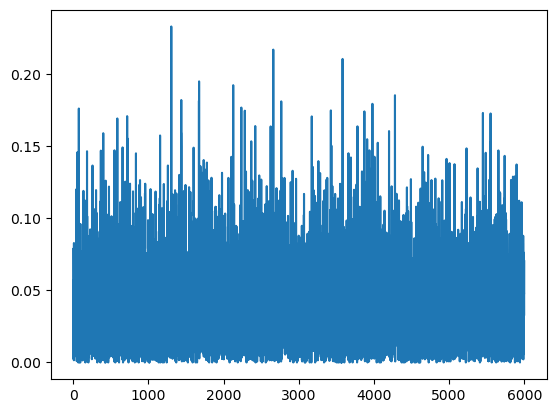

In [90]:
plt.plot(tr_f1s.mean(axis=1).mean(axis=1))

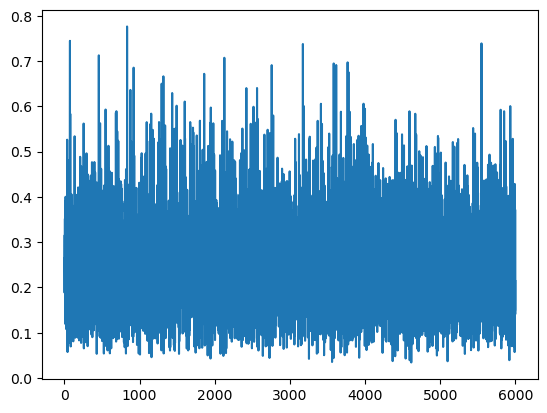

In [94]:
plt.plot(tr_f1s.mean(axis=1).mean(axis=1) + tr_lens.mean(axis=1).mean(axis=1) + tr_ems.mean(axis=1).mean(axis=1))

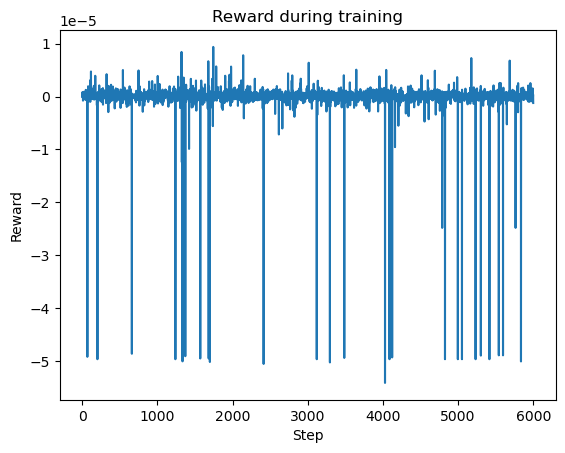

In [143]:
fig, ax = plt.subplots()
ax.set_title("Reward during training")
ax.set_ylabel("Reward")
ax.set_xlabel("Step")
plt.plot(tr_rewards)
plt.show()

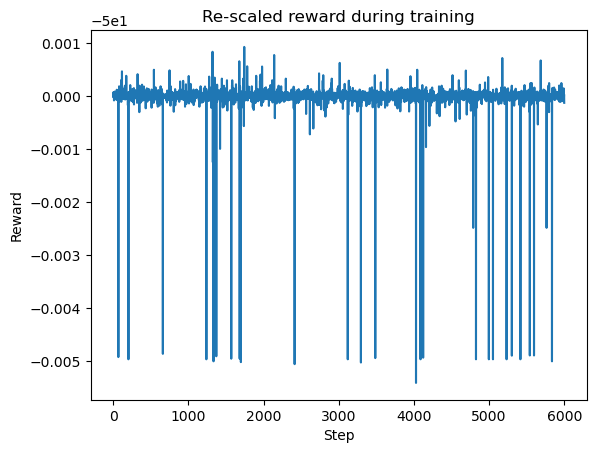

In [144]:
fig, ax = plt.subplots()
ax.set_title("Re-scaled reward during training")
ax.set_ylabel("Reward")
ax.set_xlabel("Step")
plt.plot(tr_rewards_shaped)
plt.show()

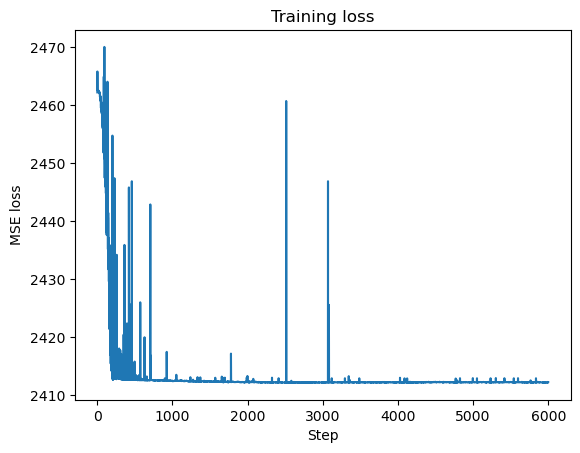

In [142]:
fig, ax = plt.subplots()
ax.set_title("Training loss")
ax.set_ylabel("MSE loss")
ax.set_xlabel("Step")
ax.plot(tr_loss)
plt.show()

In [127]:
eval_file = "./eval/outputs/2024-04-22/10-56-19/outputs.json"

with open(eval_file, 'r') as f:
    eval_data = json.load(f)

In [128]:
eval_data.keys()

dict_keys(['prompt', 'questions', 'gts', 'answers', 'em_scores', 'f1_scores', 'length_penalties', 'np_answers', 'np_em_scores', 'np_f1_scores', 'np_length_penalties'])

In [150]:
eval_data['answers'][0:5]

[' The first of them was an exhibition at the American Theatre in Manchester (1948). The first major',
 '\n\n\nThe first session was scheduled for 2 December 1962 with the next session scheduled to occur in',
 '__________________________________________________________________ The Namibian people have the right to own and consume all natural resources (',
 ' A few words have been identified within the general vocabulary mentioned above. First, the word "far,"',
 '']

In [129]:
eval_ems = np.asarray(eval_data['em_scores'])
np_ems = np.asarray(eval_data['np_em_scores'])
eval_f1s = np.asarray(eval_data['f1_scores'])
np_f1s = np.asarray(eval_data['np_f1_scores'])
eval_lens = np.asarray(eval_data['length_penalties'])
np_lens = np.asarray(eval_data['np_length_penalties'])
# eval_lens = np.asarray(eval_data['length_penalties'])

(array([2288.,  261.,  230.,  107.,   55.,   35.,   12.,    3.,    6.,
           4.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ]),
 <BarContainer object of 10 artists>)

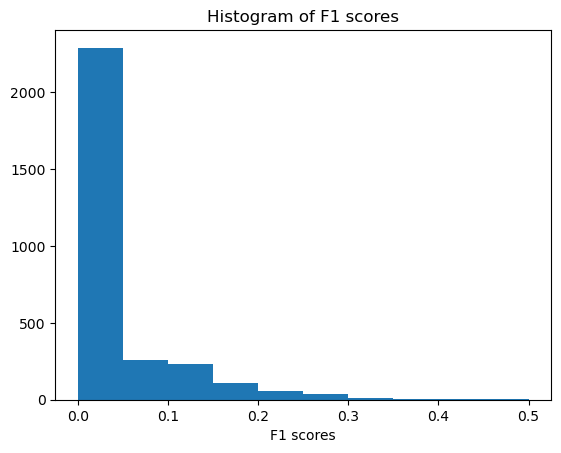

In [130]:
fig, ax = plt.subplots()
ax.set_title("Histogram of F1 scores")
ax.set_xlabel("F1 scores")
ax.set_ylabel("")
plt.hist(eval_f1s)

(array([964., 996., 422., 200., 130.,  86.,  71.,  53.,  40.,  39.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

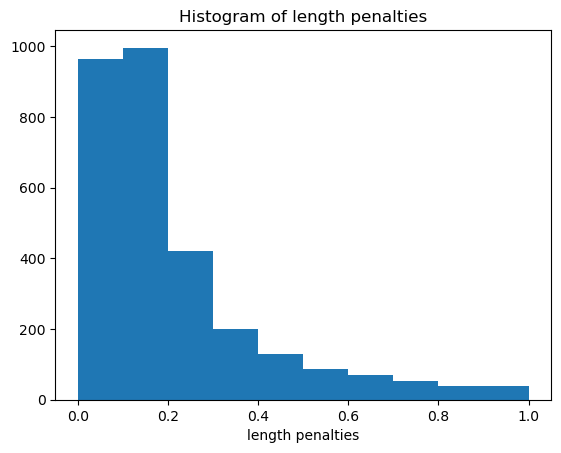

In [132]:
fig, ax = plt.subplots()
ax.set_title("Histogram of length penalties")
ax.set_xlabel("length penalties")
ax.set_ylabel("")
plt.hist(eval_lens)

In [107]:
eval_f1s.mean()

0.02740656227935796

In [114]:
eval_f1s

array([0.        , 0.        , 0.        , ..., 0.04545455, 0.04761905,
       0.18181818])

2001